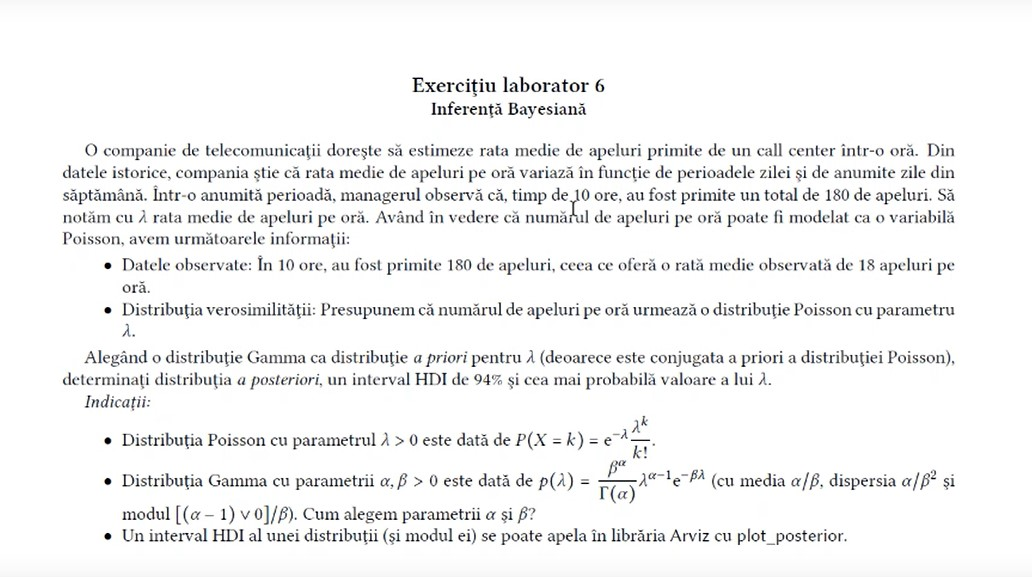


### Datele problemei

* **Date:** 180 de apeluri în 10 ore, deci o medie observată de 18 apeluri/oră.
* **Model:** Numărul de apeluri pe oră urmează o distribuție Poisson cu parametrul λ.
* **Distribuție a priori:** Se alege o distribuție Gamma pentru λ, deoarece este conjugata a priori a distribuției Poisson.

### Pasi
* **Determinarea distribuției a posteriori:** Se gaseste distribuția lui λ după ce s-au observat datele.
* **Intervalul HDI 94%:** Se gaseste un interval care conține 94% din probabilitatea a posteriori pentru λ.
* **Cea mai probabilă valoare a lui λ:** Se gaseste modulul distribuției a posteriori.

### Rezolvarea problemei

**1. Distribuția a posteriori**
* **Verosimilitatea:** Funcția de verosimilitate pentru o distribuție Poisson este:
  ```
  P(X=k) = (e^-λ * λ^k) / k!
  ```
* **Distribuția a priori:** S-a ales o distribuție Gamma cu parametrii α și β:
  ```
  p(λ) = (β^α * λ^(α-1) * e^(-βλ)) / Γ(α)
  ```
* **Distribuția a posteriori:** Prin teorema lui Bayes, distribuția a posteriori este proporțională cu produsul dintre verosimilitate și distribuția a priori. În cazul acesta, distribuția a posteriori va fi tot o distribuție Gamma cu parametri actualizați.
* **Parametrii actualizați:** Pentru a găsi noii parametri, α' și β', se folosesc următoarele formule:
  ```
  α' = α + numărul total de evenimente
  β' = β + suma timpilor
  ```
  În acest caz:
  * α' = α + 180
  * β' = β + 10

**2. Intervalul HDI 94% și modulul**
* **Utilizarea librăriei ArviZ:**
  * Se defineste o distribuție Gamma cu parametrii α' și β'.
  * Se utilizeaza funcția `plot_posterior` pentru a vizualiza distribuția a posteriori și pentru a obține intervalul HDI 94% și modulul.

### Implementare în Python (exemplu cu parametrii a și β aleși arbitrar)

```python
import numpy as np
import arviz as az

# Parametrii inițiali
alpha = 2
beta = 0.1

# Datele observate
n = 180
t = 10

# Calcularea parametrilor posteriori
alpha_post = alpha + n
beta_post = beta + t

# Crearea distribuției a posteriori
posterior = az.from_dict({'λ': az.dist.Gamma(alpha_post, beta_post).sample(1000)})

# Vizualizarea distribuției și calcularea HDI și modul
az.plot_posterior(posterior, hdi_prob=0.94)
```

### Interpretare rezultatelor
* **Intervalul HDI 94%:** Oferă un interval în care este 94% sigur că se află adevărata valoare a ratei medii de apeluri pe oră.
* **Modul:** Indică cea mai probabilă valoare a ratei medii de apeluri pe oră, dată fiind observațiile și distribuția a priori.

### Observații
* **Alegerea parametrilor a și β:** Acești parametri reflectă cunoștințele prealabile despre rata medie de apeluri. Cu cât exista mai multe informații, cu atât se pot alege valori mai precise pentru α și β.
* **Flexibilitate:** Inferența Bayesiană permite să fie actualizate constant estimările pe măsură ce sunt colectate mai multe date.
* **Interpretare:** Rezultatele obținute trebuie interpretate în contextul problemei și al alegerii distribuției a priori.